In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [10]:
data_path = 'stations.txt'
data = pd.read_csv(data_path, sep=';', header=None, names=[
    "WMO-Station ID", "StationName", "Latitude", "Longitude", "Height", "Country"
], encoding='latin1', skiprows=1)

In [11]:
data.shape

(4683, 6)

In [12]:
data.head()

,WMO-Station ID,StationName,Latitude,Longitude,Height,Country
0,01001,Jan Mayen,70.94,-08.67,9,Norway
1,01005,Isfjord Radio,78.06,13.63,9,Norway
2,01007,Ny-Alesund,78.92,11.93,8,Norway
3,01008,Svalbard,78.25,15.50,27,Norway
4,01025,Tromso,69.68,18.91,9,Norway


In [23]:
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark",
    "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland",
    "Ireland", "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania",
    "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia",
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia",
    "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom"
]
data['Country'] = data['Country'].str.strip()
european_data = data[data['Country'].isin(european_countries)]
european_data.head()

,WMO-Station ID,StationName,Latitude,Longitude,Height,Country
0,01001,Jan Mayen,70.94,-08.67,9,Norway
1,01005,Isfjord Radio,78.06,13.63,9,Norway
2,01007,Ny-Alesund,78.92,11.93,8,Norway
3,01008,Svalbard,78.25,15.50,27,Norway
4,01025,Tromso,69.68,18.91,9,Norway


In [24]:
european_data.shape

(880, 6)

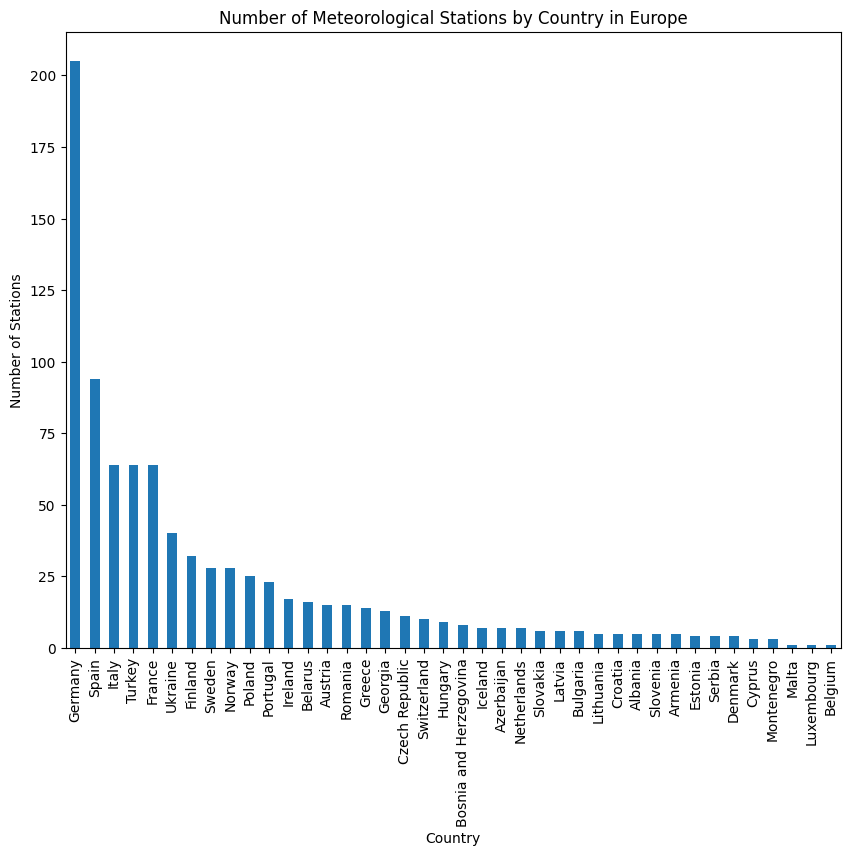

In [25]:
station_counts = european_data['Country'].value_counts()

plt.figure(figsize=(10, 8))
station_counts.plot(kind='bar')
plt.title('Number of Meteorological Stations by Country in Europe')
plt.xlabel('Country')
plt.ylabel('Number of Stations')
plt.xticks(rotation=90)
plt.show()

C:\Users\Yaroslav\AppData\Local\Temp\ipykernel_1272\101369350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_data['Coordinates'] = european_data.apply(lambda row: Point(float(row['Longitude']), float(row['Latitude'])), axis=1)
C:\Users\Yaroslav\AppData\Local\Temp\ipykernel_1272\101369350.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


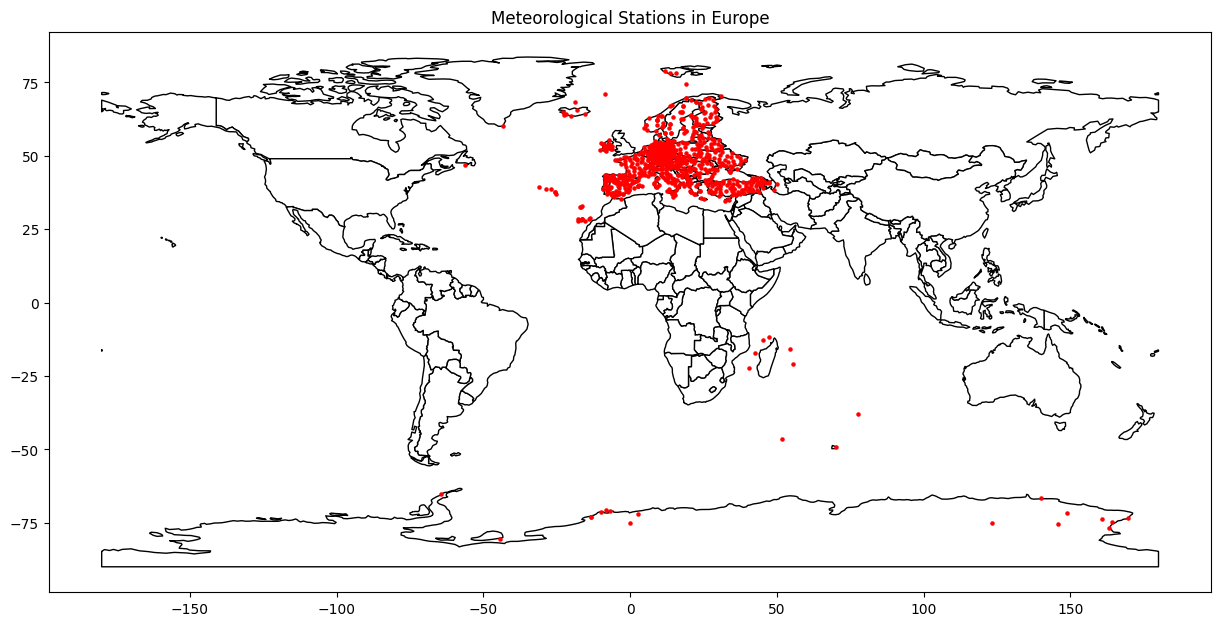

In [26]:
european_data['Coordinates'] = european_data.apply(lambda row: Point(float(row['Longitude']), float(row['Latitude'])), axis=1)
gdf = gpd.GeoDataFrame(european_data, geometry='Coordinates')
european_data = gdf[gdf['Country'].isin(european_countries)]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# europe = world[world['continent'] == 'Europe']
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
base = world.plot(ax=ax, color='white', edgecolor='black')
european_data.plot(ax=base, marker='o', color='red', markersize=5)
plt.title('Europe Meteorological Stations')
plt.show()